

# Support Vector Machines

Support vector machine is one of the most influential approaches to supervised learning.

The basic SVM is a binary classification model but SVMs have been extended to both multiclass-classification (through OvR) and regression.

Unlike probabilistic models like logistic regression, SVM is deterministic, it outputs a class identity directly, rather than class probabilities.


## SVM - Linearly separable case

It is easier to understand SVM by starting analysis with the simplest case of two-class, linearly separable training data sets.


![Margin](images/svm1.PNG)



## Which linear classifier is the best?

As shown on __Figure 1__, four differently trained linear classifiers fully separate positive and negative classes. The training error for all them is 0. Which one is the best? The anwser is: the one that will give the smallest generalization error. Intuitively it is the classifier depicted by the bold line on __Figure 1__.

_The statistical learning theory_ shows that the best generalizing classifier will be the one with the largest __margin__, where the __margin__ is defined to be the smallest distance between the decision boundary and any of the samples (correctly classified samples to be precise). The support vector machines find the decision boundary that maximizes the __margin__.




## SVM - maximum margin classifier

Let $\mathcal D=\{(\mathbf x^{(1)},y^{(1)}),...,(\mathbf x^{(m)},y^{(m)})\},\,\,\,$ where $\mathbf x\in \mathbb R^n,\,\,$ and $y\in\{-1,1\}\,\,\,$ be a training data set

The goal of SVM is to find the decision boundary - the hyperplane defined by $\mathbf w^T \mathbf x + b = 0$ - that maximizes the __margin__. 
After the model is trained the predictions can be made by evaluating:

$\hat y(\mathbf x)= sign(\mathbf w^T \mathbf x + b)$



Assuming that the training set is linearly separable $\Rightarrow$ there exists at least one choice of parametrs $\mathbf w$ and $b$ such that

$\mathbf w^T \mathbf x^{(i)} + b \gt 0\,\, \forall\, y^{(i)}=1\,\,$ and $\mathbf w^T \mathbf x^{(i)} + b \lt 0\,\, \forall\, y^{(i)}=-1,\,\,$ 

Equivalently

$\forall_{i}\,\, y^{(i)}(\mathbf w^T \mathbf x^{(i)} +b) \gt 0$

Given that the perpendicular distance of an arbitrary point $\mathbf x$ from a hyperplane defined by $\mathbf w^T \mathbf x +b=0$ is $\dfrac{\vert \mathbf w^T \mathbf x +b \vert} {\Vert \mathbf w \Vert}\,\,$ and that $y^{(i)}(\mathbf w^T \mathbf x^{(i)} +b) \gt 0\,\,$ the distance of a point $\mathbf x^{(i)}$ to the decision surface can written as:

$\dfrac{y^{(i)}(\mathbf w^T \mathbf x^{(i)} + b)}{\Vert \mathbf w \Vert}$

The margin is given by the perpendiculuar distance to the closet point $\mathbf x^{(i)}$ from the data set, and we wish to optimize the parameters $\mathbf w$ and $b$ to maximize the distance. Thus the maximum margin solution is found by solving

$\underset{\mathbf x, b}{\arg\max} \left \{ \dfrac{1}{\Vert \mathbf w \Vert} \underset{\forall_{i}}{\min} (y^{(i)}(\mathbf w^T \mathbf x^{(i)} + b)) \right \}$

Direct solution of this optimization problem would be very complex, so we can simplify it by noticing that rescaling $\mathbf w \rightarrow k\mathbf w$ and $b \rightarrow kb$ does not change the distance from any point $\mathbf x$ to the decision surface. As a result we can set 

$y^{(i)}(\mathbf w^T \mathbf x^{(i)} + b)=1$

for the point(s) that is closest to the surface. In this case, all data points will satisfy the constraints:

$\forall_{i}\,\, y^{(i)}(\mathbf w^T \mathbf x^{(i)} + b) \geq 1$

The optimization problem simplifies to

$\underset{\mathbf w, b}{\arg\min}\,\dfrac{1}{2} {\Vert \mathbf w \Vert}^2,\,\,\,$ s.t. $\forall_{i}\,\, y^{(i)}(\mathbf w^T \mathbf x^{(i)} + b) \geq 1$





## SVM training

$\underset{\mathbf w, b}{\arg\min}\,\dfrac{1}{2} {\Vert \mathbf w \Vert}^2,\,\,\,$ s.t. $\forall_{1 \leq i \leq m}\,\, y^{(i)}(\mathbf w^T \mathbf x^{(i)} + b) \geq 1$ is an example of a quadratic programming problem in which we are trying to minimize a quadratic function subject to a set of linear inequality contraints. 

This optimization problem can be solved using the method of Lagrange multipliers and optimizing the loss function defined as:

$L(\mathbf w, b, \boldsymbol \alpha) = \dfrac{1}{2} {\Vert \mathbf w \Vert}^2 - \sum_{i=1}^m \alpha_i(y^{(i)}(\mathbf w^T \mathbf x + b)-1)\,\,$, where $\boldsymbol \alpha \in \mathbb R^m$

Which can be further transformed into the dual optimization problem, which is entirely formulated in terms of Lagrange multipliers:

$\boldsymbol \alpha^* = \underset{\boldsymbol \alpha}{\arg\max}\,\, -\dfrac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i\alpha_j y^{(i)} y^{(j)} \mathbf x^{(i)} \cdot \mathbf x^{(j)} + \sum_{i=1}^m \alpha_i\,\, $ s.t. $\forall_i\,\, \alpha_i \geq 0\,$ and $\sum_{i=1}^m \alpha_i y^{(i)} =0$

The solution is then of the form:

$\mathbf w = \sum_{i=1}^m \alpha_i y^{(i)} \mathbf x^{(i)}$

$b=y^{(k)}-\mathbf w^T \mathbf x^{(k)}\,\,$ for any $\mathbf x^{(k)}$ such that $\alpha_k \neq 0$

Searching for the maximum margin decision boundry is equivalent to searching for the support vectors - they are the training examples with non-zero Lagrange multipliers, and they completely determine the decision boundry. The Lagrange multipliers for all other training examples will be zero.

In order to classify new data points using the trained model (optimized $\boldsymbol \alpha$) we evaluate the sign of 

$\hat y(\mathbf x)= sign(\mathbf w^T \mathbf x + b) = sign(\sum_{i=1}^m \alpha_i y^{(i)} \mathbf x \cdot \mathbf x^{(i)} + b )$

## Soft margin SVM

If the data is not linearly separable, then the contraint $\forall_{i}\,\, y^{(i)}(\mathbf w^T \mathbf x^{(i)} + b) \geq 1$ is not satisfiable. There is an elegant solution to this problem. The idea is to introduce __slack variables__ $\xi^{(i)}$, one for each example, which allow some of them to be inside the margin or even at the wrong side of the decision boundary. Thus the constraint is changed to:

$\forall_{i}\,\, y^{(i)}(\mathbf w^T \mathbf x^{(i)} + b) \geq 1 - \xi^{(i)}$

And the optimization problem to:

$\underset{\mathbf w, b, \boldsymbol \xi}{\arg\min}\,\dfrac{1}{2} {\Vert \mathbf w \Vert}^2 + C\sum_{i=1}^m\xi^{(i)},\,\,\,$ s.t. $\forall_{i}\,\, y^{(i)}(\mathbf w^T \mathbf x^{(i)} + b) \geq 1-\xi^{(i)}\,\,$ and $\forall_i\,\, \xi^{(i)} \geq 0$

Which leads to an additional upper bound on $\alpha_i$ in the dual problem:

$\boldsymbol \alpha^* = \underset{\boldsymbol \alpha}{\arg\max}\,\, -\dfrac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i\alpha_j y^{(i)} y^{(j)} \mathbf x^{(i)} \cdot \mathbf x^{(j)} + \sum_{i=1}^m \alpha_i\,\, $ s.t. $\forall_i\,\, 0 \leq \alpha_i \leq C\,$ and $\sum_{i=1}^m \alpha_i y^{(i)} =0$

The solution to the soft margin optimization problem in dual form divides the training examples into three cases:

$\alpha_i = 0\,\,$ these are outside the margin

$0 \leq \alpha_i \leq C\,$ these are the support vectors on the margin

$\alpha_i = C\,\,$ these are inside the margin

Via the variable C, we can control the penalty for misclassification. Large values of C correspond to large penalties, whereas we are less strict about misclassification errors for smaller values of C. In the context C acts as a regularization parameter. Decreasing the value of C increases the bias and lowers the variance.


### Using C to control misclassification tolerance

![Soft margin SVM](images/svm2.PNG)


## Going beyond linearity 

The basic idea behind dealing with linearly inseparable data is to project the __input space__ (original input features) to the higher dimensional __feature space__ where it becomes linearly separable.

For example. 

Let $\phi : \mathbb R^2 \rightarrow  \mathbb R^3\,$ such as:

$\phi(\mathbf x)= \mathbf z\,$, where $z_1 = x_1,\,z_2=x_2,\,z_3=x_1^2+x_2^2$


As demonstrated on the example below the data set that is clearly not linearly separable in the input space  can be separated by a linear hyperplane in the 3D feature space, defined by:

$\mathbf w^T \phi(\mathbf x) + b = 0$






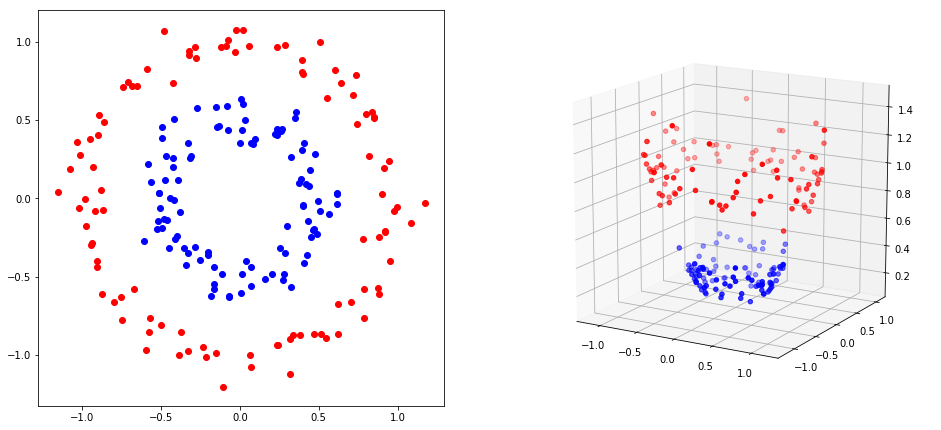

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles

%matplotlib inline


X, y = make_circles(n_samples=200, factor=.5, noise=.08)
z1 = X[:,[0]]
z2 = X[:,[1]]
z3 = X[:,[0]]*X[:,[0]] + X[:,[1]]*X[:,[1]]
Z = np.concatenate((z1, z2, z3), axis=1)

reds = y == 0
blues = y == 1

fig = plt.figure(figsize=(16,16))

ax = fig.add_subplot(221)
plt.scatter(X[reds,0], X[reds,1], c='red')
plt.scatter(X[blues,0], X[blues, 1], c='blue')

ax = fig.add_subplot(222, projection='3d')
ax.view_init(elev=15, azim = -60)
ax.scatter(Z[reds,0], Z[reds,1], Z[reds, 2], c='red')
ax.scatter(Z[blues,0], Z[blues, 1], Z[blues, 2], c='blue')



## The kernel trick

The kernel trick is based on the observation that many machine learning algorithms can be written exclusively in terms of dot products between samples. For example, as shown before,  the linear function used by the support vector machine has the below form:

$\mathbf w^T \mathbf x + b = \sum_{i=1}^m \alpha_i \mathbf x^T \mathbf x^{(i)} = \sum_{i=1}^m \alpha_i \mathbf x \cdot \mathbf x^{(i)}$

Or, if we use feature transformation to the higher dimensional space

$\mathbf w^T \phi(\mathbf x) + b =  \sum_{i=1}^m \alpha_i \phi(\mathbf x) \cdot \phi(\mathbf x^{(i)})$

Now if there were a function $k$ - called a __kernel__ - such that $k(\mathbf x, \mathbf x^{'})=\phi(\mathbf x) \cdot \phi(\mathbf x^{'})$ we would never need to explicitly even know what $\phi$ is. 

Furthermore, in many cases, $k(\mathbf x, \mathbf x^{'})$ is a nonlinear, tractable function of $\mathbf x$ even when $\phi(\mathbf x) \cdot \phi(\mathbf x^{'})$ in intractable - for example when $\phi(\mathbf x)$ is infinite dimensional.

Kernel methods are an excellent fit for support vector machines as $\boldsymbol \alpha$ in $\sum_{i=1}^m \alpha_i \mathbf x \cdot \mathbf x^{(i)}$ is a sparse vector. As such the inference with SVM can very high performance.


## Common kernels

The most commonly used kernel is the __Gaussian kernel__ also known as the __radial basis function__ or RBF kernel.

$k(\mathbf x, \mathbf x^{'})=e^{-\Vert \mathbf x - \mathbf x^{'} \Vert/2\delta^2}$

The RBF kernel corresponds to a dot product in an infinite-dimmensional space.

The other kernels that have been investigated includ:

$k(\mathbf x, \mathbf x^{'})=(\mathbf x \cdot \mathbf x^{'} + 1)^p\,\,$ This kernel results in a classifier that is a polynomial of degree $p$.

$k(\mathbf x, \mathbf x^{'})=\tanh (k\mathbf x \cdot \mathbf x^{'} - \delta)$.  

